Inspect duplicated smiles string in smart dataset 
Decision: rebuild ranking-set without repeated SMILES

In [40]:
import torch, pickle, yaml
all_smiles_train = pickle.load(open('/workspace/SMILES_dataset/train/SMILES/index.pkl', 'rb'))
all_smiles_val = pickle.load(open('/workspace/SMILES_dataset/val/SMILES/index.pkl', 'rb'))
all_smiles_test = pickle.load(open('/workspace/SMILES_dataset/test/SMILES/index.pkl', 'rb'))

all_chemical_names_train = pickle.load(open('/workspace/SMILES_dataset/train/Chemical/index.pkl', 'rb'))
all_chemical_names_val = pickle.load(open('/workspace/SMILES_dataset/val/Chemical/index.pkl', 'rb'))
all_chemical_names_test = pickle.load(open('/workspace/SMILES_dataset/test/Chemical/index.pkl', 'rb'))

In [41]:
# smart_dataset = pickle.load(open('/root/gurusmart/MorganFP_prediction/James_dataset_zips/SMART_dataset_v2_new.pkl', 'rb'))

In [42]:
# for k,v in smart_dataset.items():
#     print(k)
#     print(v.keys())
#     break

In [43]:
# len(smart_dataset)

In [44]:
from collections import defaultdict

def file_exists(split, index):
    file_path = f'/workspace/SMILES_dataset/{split}/HSQC/{index}.pt'
    try:
        with open(file_path, 'r') as f:
            return True
    except FileNotFoundError:
        return False

def find_duplicates(smiles: dict, chemical_names:dict, split):
    smiles_to_chemical_and_index = defaultdict(list) #smiles -> [(chemical, index)]
    for index, smile in smiles.items():
        
        if file_exists(split, index):
            chemical_name = chemical_names[index]
            smiles_to_chemical_and_index[smile].append((chemical_name, index))
            
    duplicates = {smile: chemical_and_index for smile, chemical_and_index in smiles_to_chemical_and_index.items() if len(chemical_and_index) > 1}
    print(f"number of duplicates smiles: {len(duplicates)}")
    total_molecules = sum([len(v) for v in duplicates.values()])
    
    for k,v in (duplicates.items()):
        print(k+":")
        print(v)
        print()
    return duplicates
    

In [45]:
val_set_duplicates = find_duplicates(all_smiles_val, all_chemical_names_val, "val")
# val_set_duplicates

number of duplicates smiles: 1977
C#CC(O)C=CCCCCCCC#CCC=CCC=CCCCCCCCCC(O)C#C:
[('dideoxypetrosynol F', 17), ('Dideoxypetrosynol F', 18)]

C#CC(O)C=CCCCCCCCCCC#CCCCCCCCCCCCCC=CC#CC(=O)O:
[('(-)-petrosynoic acid B', 21), ('(-) petrosynoic acid B', 22)]

C#CC(O)C=CCCCCCCCCCC=CCCCCCCCCCC=CC(O)C#C:
[('(-)-duryne', 23), ('(+)-duryne', 24), ('duryne', 25)]

C#CC=CC(O)CCCCCCCCC(C)CCCCCCCCCCCC=CC(O)C#C:
[('miyakosyne F', 31), ('1312225-48-1', 32)]

C#CC=CCC(Cl)C1CC(O)C(O)C=CC(CC)O1:
[('(3Z,7R*, 9R*, 10R*, 13R*)-6-chlorolauthisa-3,11-dien-1-yne-9,10-diol', 36), ('6-chlorolauthisa-3E,11-dien-1-yne-diol', 37), ('80685-18-3', 38)]

C#CC=CCC1OC(=C(Br)CC)C2C=CCC1O2:
[('cis-chondrin', 40), ('trans-chondrin', 41)]

C#CC=CCC1OC(C(Br)CC)CC=CCC1Cl:
[('(-)-3E,6R,7R-pinnatifidenyne', 42), ('13-epipinnatifidenyne', 43), ('3E,12R,13R-pinnatifidenyne', 44), ('cis-dihydrorhodophytin', 45), ('E-dihydrorhodophytin', 46), ('trans-pinnatifidenyne', 47), ('Z-pinnatifidienyne', 48)]

C#CC=CCC=CCC=CCC=CCC:
[('laurence

In [46]:
from matplotlib import pyplot as plt

smiles: C#CC(O)C=CCCCCCCC#CCC=CCC=CCCCCCCCCC(O)C#C
smiles: C#CC(O)C=CCCCCCCCCCC#CCCCCCCCCCCCCC=CC#CC(=O)O
smiles: C#CC(O)C=CCCCCCCCCCC=CCCCCCCCCCC=CC(O)C#C
smiles: C#CC=CC(O)CCCCCCCCC(C)CCCCCCCCCCCC=CC(O)C#C
smiles: C#CC=CCC(Cl)C1CC(O)C(O)C=CC(CC)O1
smiles: C#CC=CCC1OC(=C(Br)CC)C2C=CCC1O2
smiles: C#CC=CCC1OC(C(Br)CC)CC=CCC1Cl
smiles: C#CC=CCC=CCC=CCC=CCC
smiles: C#CC=CCCCCCCCCC#CCCC(=O)NCCc1ccccc1
smiles: C#CCCCC(=CCl)CCC(C)C=CCCC(=O)NCCC(=CC(=O)N1C(=O)C=CC1C)OC


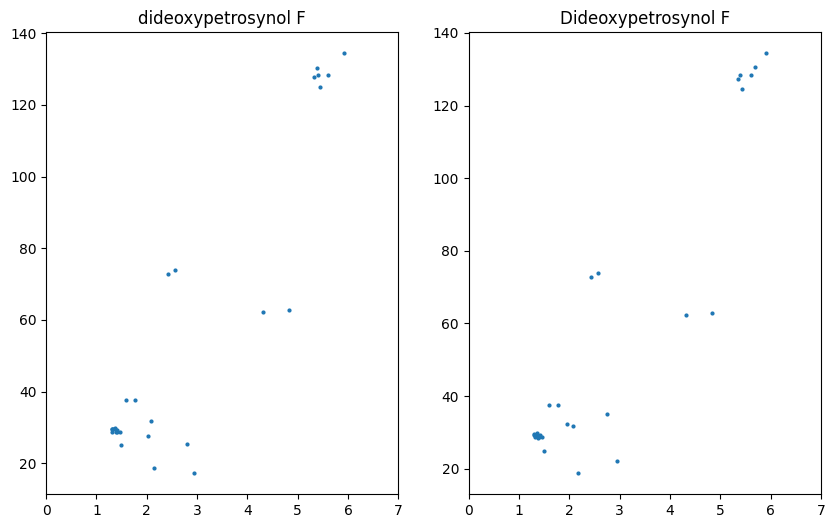

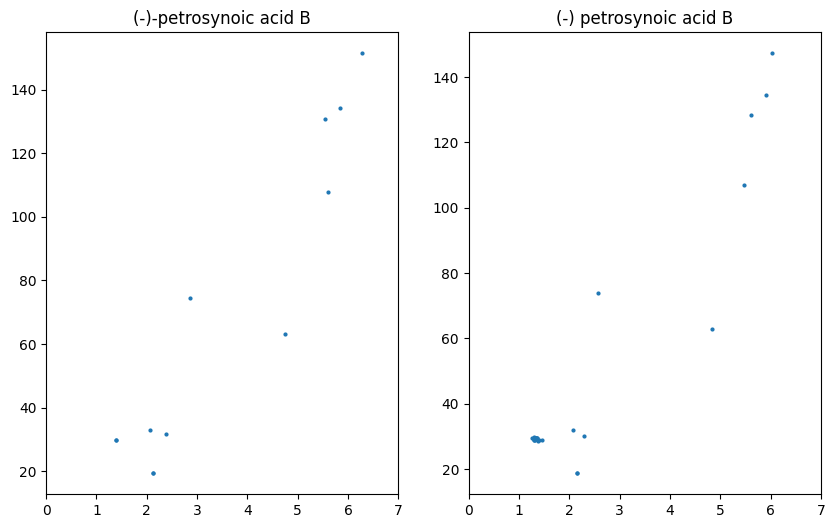

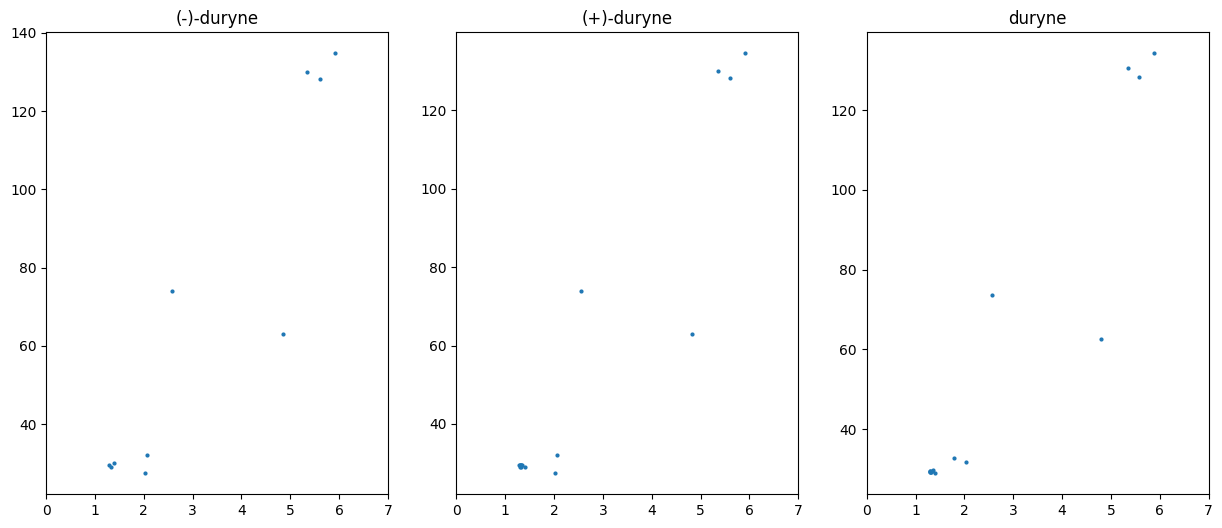

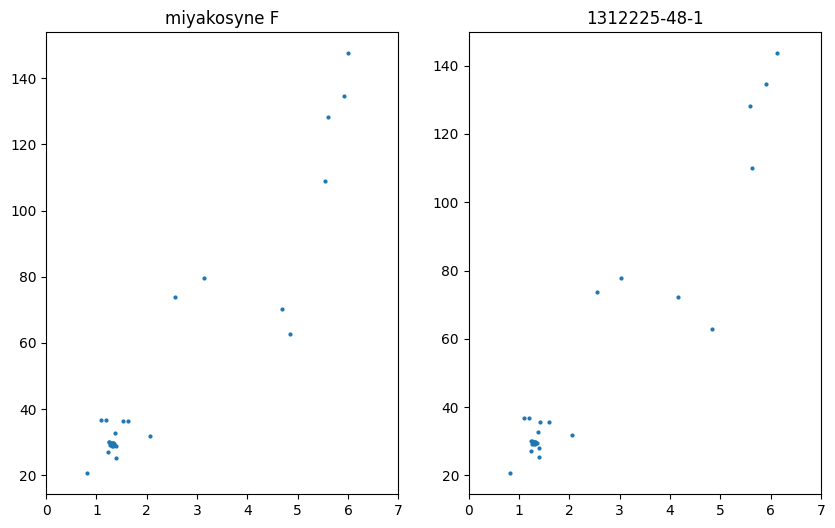

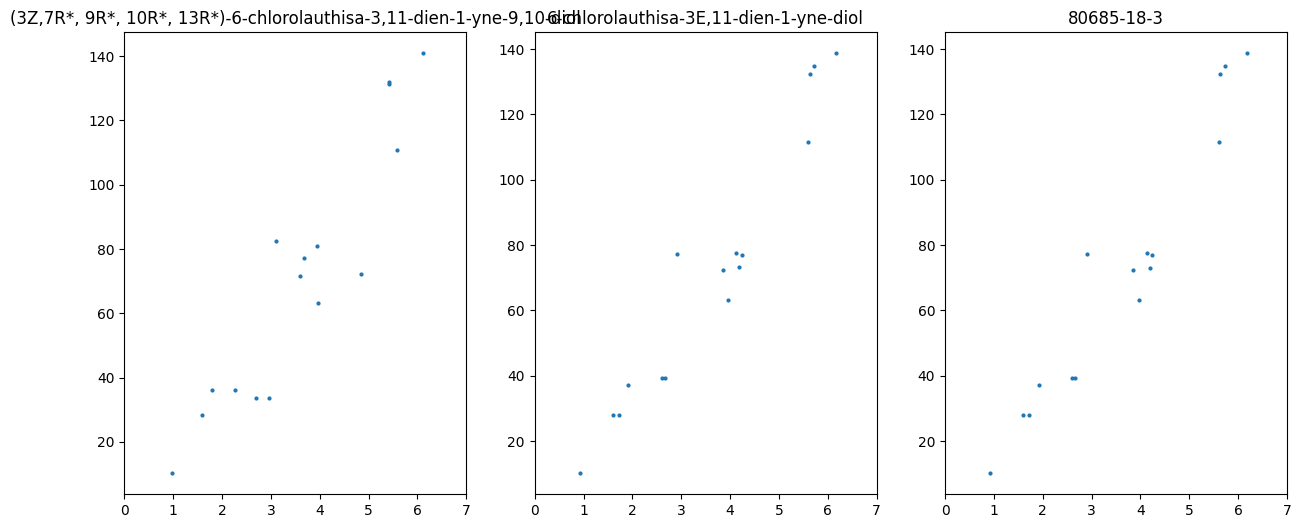

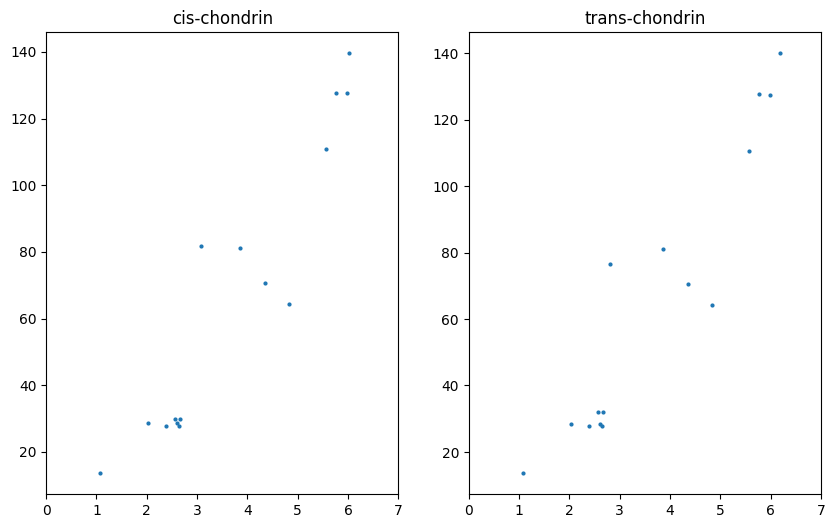

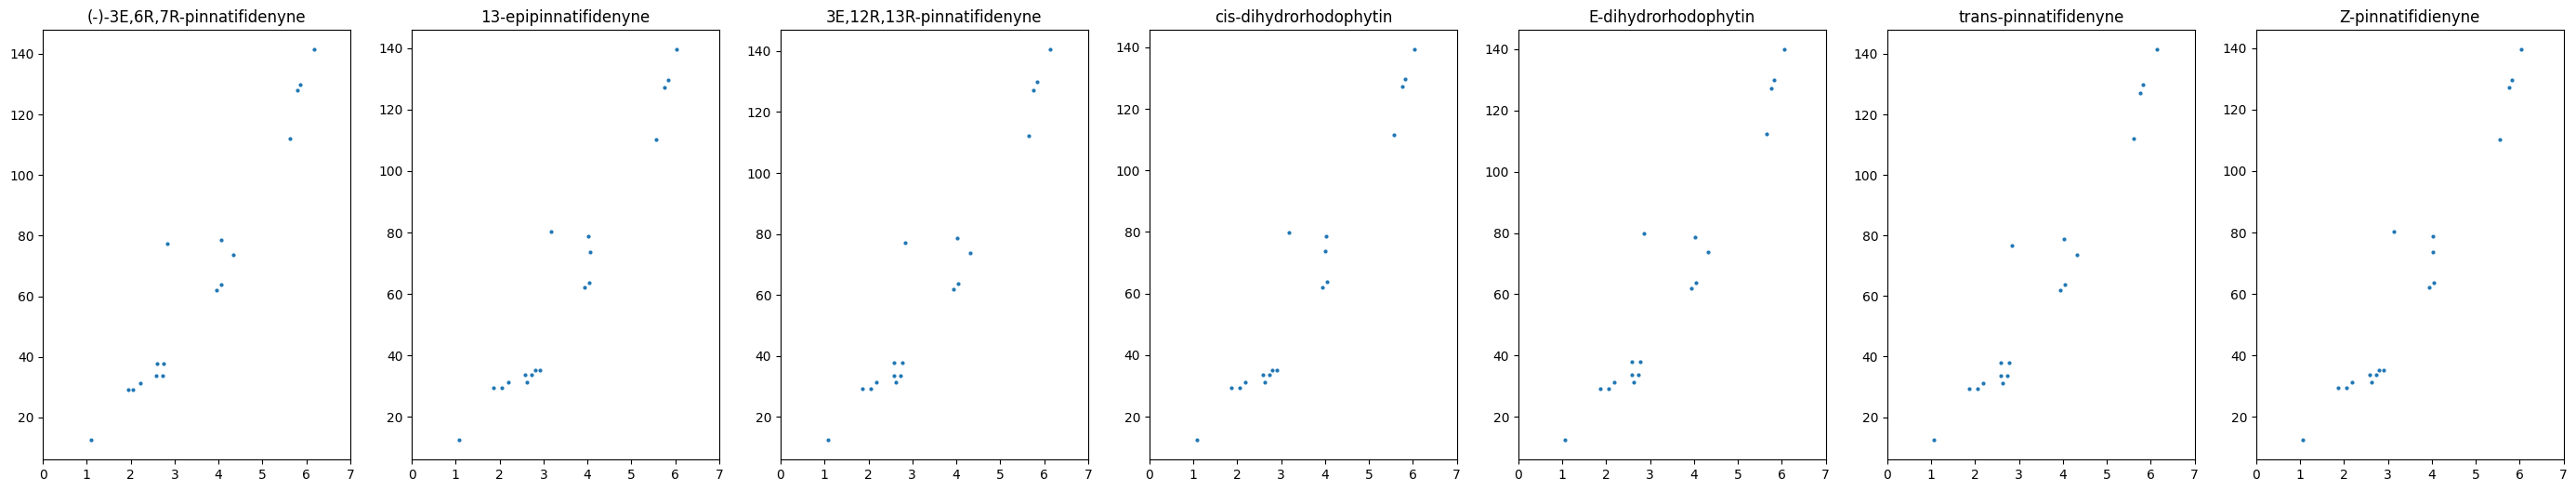

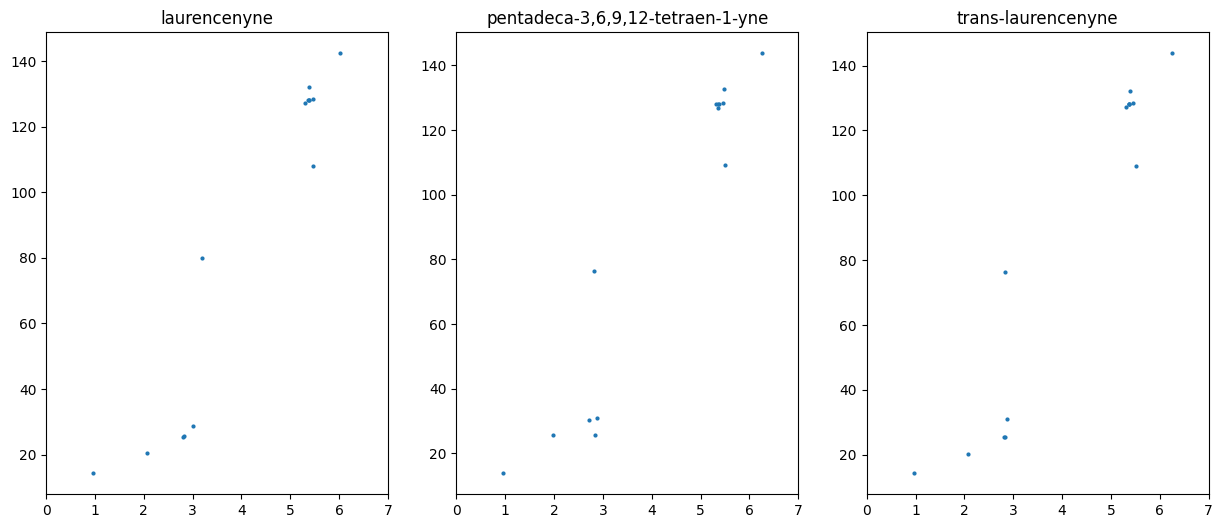

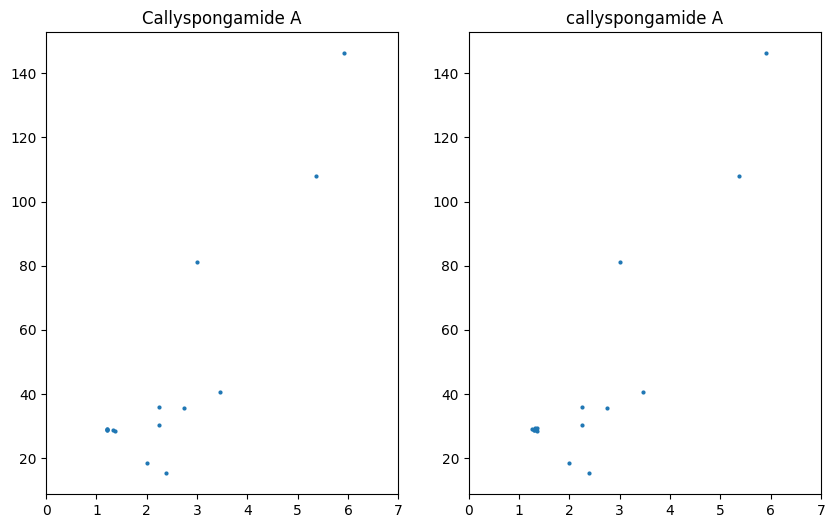

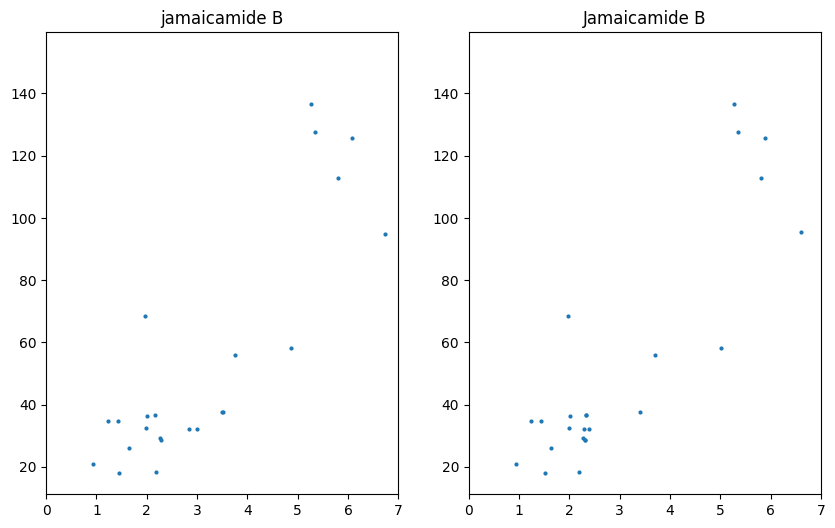

In [53]:
# compare samples of NMRs of duplicates
import os
ite = 0
for s,duplicates in val_set_duplicates.items():
    ite += 1
    # if ite<10: continue
    if ite > 10:
        break
    
    print('smiles:', s)
    all_hsqc = []
    all_names = []
    for chemical, index in duplicates:
        hsqc = torch.load(os.path.join('/workspace/SMILES_dataset/val/HSQC', f'{index}.pt'))
        all_hsqc.append(hsqc)
        all_names.append(chemical)
        # print((hsqc))
    fig, axs = plt.subplots(1, len(all_hsqc), figsize=(5*len(all_hsqc), 6)) 
    
    
    for i in range(len(all_hsqc)):
        # print (f"hsqc is {all_hsqc[i]}")
        axs[i].scatter(all_hsqc[i][:,1],all_hsqc[i][:,0], s=4)
        axs[i].set_xlim([0, 7])
        axs[i].set_title(all_names[i])
  
    
    # print()

In [49]:
import numpy as np

jacamide_B = np.array([[  1.97,  68.6 ],
       [  2.19,  18.3 ],
       [  1.64,  26.1 ],
       [  2.26,  29.3 ],
       [  1.99,  32.6 ],
       [  1.33,  34.7 ],
       [  2.01,  36.3 ],
       [5.26, 136.6],
       [5.35, 127.5],
       [2.17, 36.7],
       [  2.28,  28.5 ],
       [  3.5 ,  38.2 ],
       [2.98, 32.2],
       [2.83, 32.2],
       
       [  6.72,  94.9 ],
       [6.07, 125.9 ],
       [7.21, 153.1],
       [1.45, 17.9],
       [0.93, 20.8],
       
       [  4.87,  58.1 ],
       [  3.74,  56.1 ],
       [  5.81, 112.7 ]])
# swap columns
jacamide_B = jacamide_B[:,[1,0]]
# plt.figure(figsize=(3,5))

# plt.scatter(jacamide_B[:,1],jacamide_B[:,0], s=4)
all_hsqc.append(jacamide_B)
all_names.append('jacamide_B_from_paper')

In [50]:
jacamide_A = np.array(
    [  [2.22, 19.6],
  [1.63, 25.8],
  [2.25, 29.2],
  [2.00, 32.6],
  [1.34, 34.7],
  [2.02, 36.3],
  [5.26, 136.6],
  [5.35, 127.5],
  [2.28, 28.5],
  [2.18, 36.7],
  [3.49, 38.2],
#   [3.53, nan],
  [2.84, 32.3],
#   [3.00, nan],
  [6.73, 95.0],
  [6.08, 125.8],
  [7.22, 153.1],
  [4.87, 58.1],
  [1.46, 17.9],
  [3.75, 56.1],
  [0.94, 20.8],
  [5.79, 112.8]
])

jacamide_A = jacamide_A[:,[1,0]]
all_hsqc.append(jacamide_A)
all_names.append('jacamide_A_from_paper')

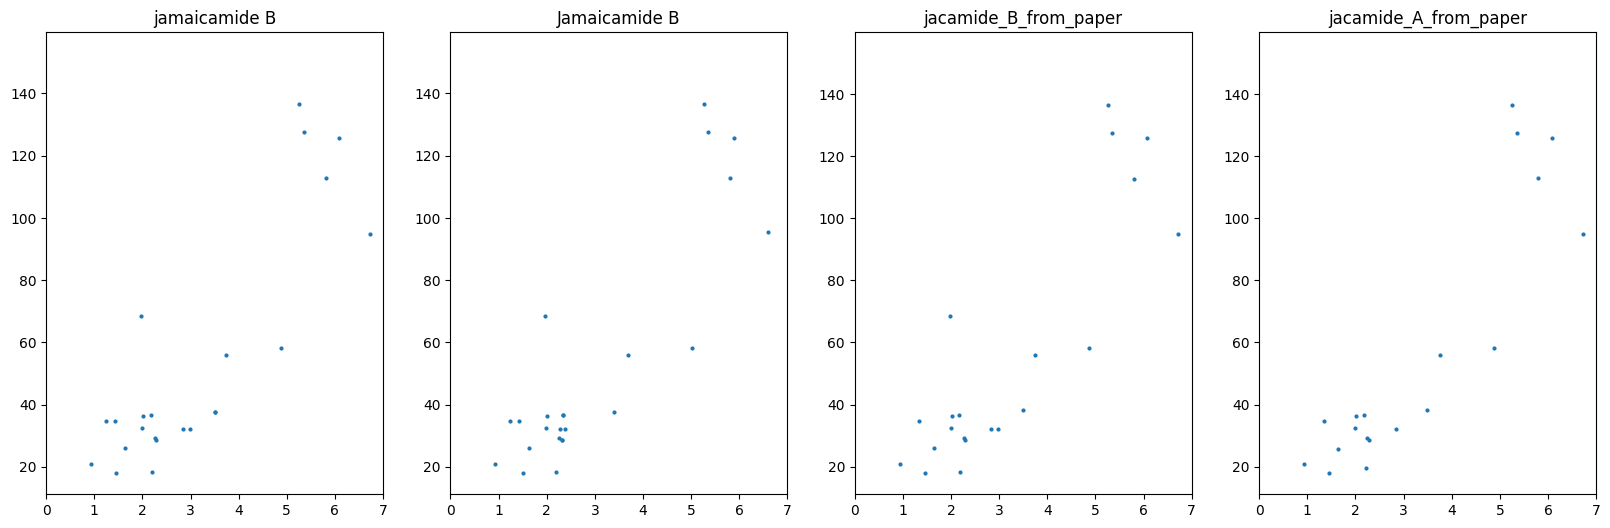

In [51]:
fig, axs = plt.subplots(1, len(all_hsqc), figsize=(5*len(all_hsqc), 6)) 

for i in range(len(all_hsqc)):
    # print (f"hsqc is {all_hsqc[i]}")
    axs[i].scatter(all_hsqc[i][:,1],all_hsqc[i][:,0], s=4)
    axs[i].set_xlim([0, 7])
    axs[i].set_title(all_names[i])

In [52]:
all_smiles_test

{0: 'Br.CCCN(CCC)C1CCc2cccc(O)c2C1',
 1: 'Br.COC1CC=C2CCN3CCC4=C(CC(=O)OC4)C23C1',
 2: 'Br.Oc1cc2c(c(Cl)c1O)CCNCC2c1ccccc1',
 3: 'BrCBr',
 4: 'BrCCBr',
 5: 'Brc1cc(Br)c2cc(Br)[nH]c2c1',
 6: 'Brc1cc(Br)c2oc3c(Br)c(Br)[nH]c3c2c1',
 7: 'Brc1cc(Br)c2oc3c(Br)c(Br)[nH]c3c2c1',
 8: 'Brc1ccc2c(-c3ncc(-c4c[nH]c5ccccc45)[nH]3)c[nH]c2c1',
 9: 'Brc1ccc2c(C3=NCCc4c3[nH]c3ccccc43)c[nH]c2c1',
 10: 'Brc1ccc2c(C3CNC(c4c[nH]c5cc(Br)ccc45)CN3)c[nH]c2c1',
 11: 'C#CC#CC#C',
 12: 'C#CC#CC(=O)CCCCCCCCCC=C(Br)CCCCCC',
 13: 'C#CC#CC=C=CCO',
 14: 'C#CC#CCCCCC=CC(=O)NCC(C)C',
 15: 'C#CC#CCCCCC=CC(=O)NCC(C)C',
 16: 'C#CC(=O)C=CCCCCCCCCCC=CCCCCC=CCCCCC=CCCCCCCCCCCCCCC=CC(O)C#C',
 17: 'C#CC(=O)OCC12CCC(C(=C)C)C1C1CCC3C4(C)CCC(OC(=O)C#C)C(C)(C)C4CCC3(C)C1(C)CC2',
 18: 'C#CC(C)(O)CCCC(=C)C',
 19: 'C#CC(C=CCCCCCCCCCCC=CC(C#C)OC(C)=O)OC(C)=O',
 20: 'C#CC(O)C(N)C(=O)O',
 21: 'C#CC(O)C=CC(O)CCCC(O)C(O)C#CC(O)C#CCCCC(O)C=CCCCCCC(=O)CCCCCCCCCCCCCC(O)C(O)C(O)C#CC(=O)O',
 22: 'C#CC(O)C=CCCCCCC=CCCCCCCCCCCC=CCCCCCCCCCCC=CCCCC